## Analyzing my custom Berkeley housing projects dataset

James Wilde

6/27/25

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# For this analysis, we can convert some values into null
df = pd.read_csv("Downtown Berkeley Housing Projects - Projects.csv", 
    na_values=["Unknown", "None listed", "Not yet approved", "Not completed"])


In [3]:
df.head(5)

,Name,Address,Required Demolition,Stories,Total Units,Below Market Rate Units,Year City Approved,Year Building Completed,Notes
0,2344 Fulton,"2344 Fulton St, Berkeley, CA 94704",NaN,NaN,18,NaN,NaN,NaN,Pre-application request under review.
1,1974 Shattuck,"1974 Shattuck Ave, Berkeley, CA",Five commercial buildings; merge four lots. In...,28.0,599,58.0,2025.0,NaN,Tallest proposed building in Berkeley so far. ...
2,The Hub,"2128 Oxford St, Berkeley, CA 94704",Two buildings (one mixed-use with 16 rent-cont...,26.0,456,40.0,2024.0,NaN,NaN
3,2190 Shattuck,"2190 Shattuck Ave, Berkeley, CA 94704",NaN,25.0,326,32.0,2023.0,NaN,Controversial design as opponents worry it cou...
4,2029 University,"2029 University Ave, Berkeley, CA 94704",Existing non-landmarked 2-story commercial str...,23.0,240,36.0,NaN,NaN,Currently under review.


In [4]:
df.dtypes

Name                        object
Address                     object
Required Demolition         object
Stories                    float64
Total Units                  int64
Below Market Rate Units    float64
Year City Approved         float64
Year Building Completed    float64
Notes                       object
dtype: object

Note: most of these used floats because they include null values.

In [5]:
df['Stories'].mean().round(2)

11.47

In [6]:
df['Total Units'].mean().round(2)

151.23

In [7]:
df['Below Market Rate Units'].mean().round(2)

22.91

In [8]:
df['Year City Approved'].mean().round(2)

2021.71

<Axes: >

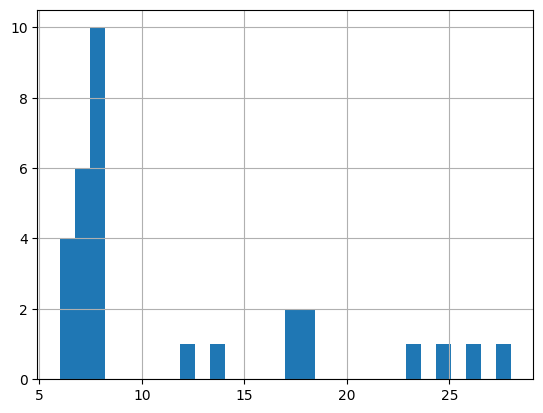

In [9]:
df['Stories'].hist(bins=30)

Looks like most of the buildings are between 5 to 10 stories.

<Axes: >

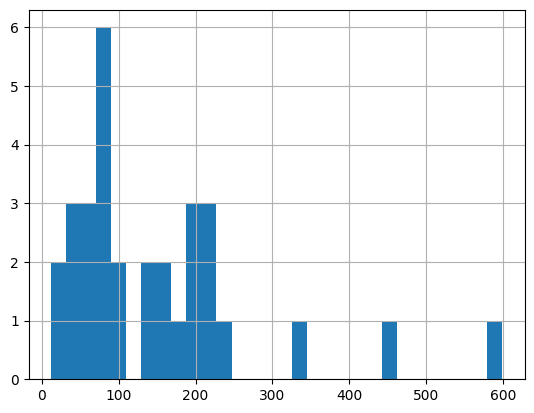

In [10]:
df['Total Units'].hist(bins=30)

Looks like all but three of the buildings have less than 250 units.

<Axes: >

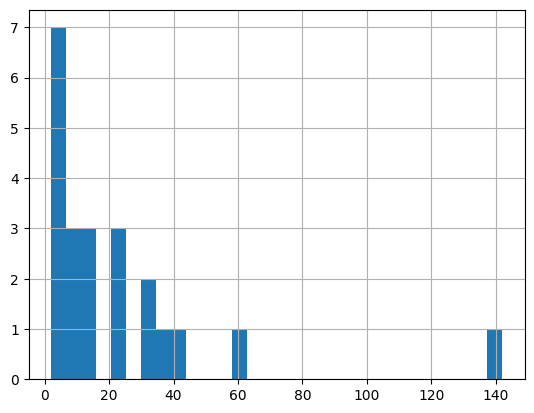

In [11]:
df['Below Market Rate Units'].hist(bins=30)

And it looks like nearly all of the buildings have less than 40 below market units rates. Mostly fewer than 20.

Let's get some totals.

In [12]:
df['Total Units'].sum()

4688

In [13]:
df['Below Market Rate Units'].sum()

504.0

In [14]:
(
    df['Below Market Rate Units'].sum() / df['Total Units'].sum()
    * 100
)

10.750853242320819

About 10.75% of the 4,688 units are below market rate units.

In [15]:
df['Year City Approved'].value_counts()

Year City Approved
2024.0    5
2023.0    4
2019.0    4
2020.0    3
2022.0    2
2025.0    1
2021.0    1
2018.0    1
Name: count, dtype: int64

Larger shares of units approved in 2019, 2023, 2024. I know there are lots of null values there though.

In [16]:
df['Year City Approved'].isnull().value_counts()

Year City Approved
False    21
True     10
Name: count, dtype: int64

10 null values to be exact. Let's look at the 2024 projects.

In [17]:
df[df['Year City Approved'] == 2024]

,Name,Address,Required Demolition,Stories,Total Units,Below Market Rate Units,Year City Approved,Year Building Completed,Notes
2,The Hub,"2128 Oxford St, Berkeley, CA 94704",Two buildings (one mixed-use with 16 rent-cont...,26.0,456,40.0,2024.0,NaN,NaN
5,2113 Kittredge,"2113 Kittredge St, Berkeley, CA 94704",The commercial building on a\nlandmarked site ...,18.0,211,22.0,2024.0,NaN,Would include a new 300-seat live theater space.
7,2274 Shattuck,"2274 Shattuck Ave, Berkeley, CA 94704",The commercial building with the preservation ...,17.0,227,23.0,2024.0,NaN,NaN
18,2037 Durant,"2037 Durant Ave, Berkeley, CA 94704","A one-story, 13,000 square-foot commercial bui...",8.0,74,4.0,2024.0,NaN,NaN
23,2550 Shattuck,"2550 Shattuck Ave, Berkeley, CA 94704","A 2-story (25 feet) 14,296 square-foot non-res...",7.0,72,15.0,2024.0,NaN,"Technically zoned as ""Adeline Corridor Commerc..."


Now I'm curious: how many units per year?

In [18]:
(
    df.groupby('Year City Approved')['Total Units']
    .sum()
    .reset_index()
    .sort_values(by='Total Units', ascending=False)
)

,Year City Approved,Total Units
6,2024.0,1040
5,2023.0,777
7,2025.0,599
1,2019.0,470
2,2020.0,285
0,2018.0,142
3,2021.0,82
4,2022.0,52


OK, now let's generate some coordinates for each of these projects.

In [19]:
import geocoder
import os
from dotenv import load_dotenv

In [20]:
load_dotenv()

api_key = os.getenv("api_key")

In [21]:
# A function to get the latitude and longitude
def get_lat_lng(address):
    try:
        g = geocoder.google(address, key=api_key)
        if g.ok:
            return g.latlng 
        else:
            return [None, None]
    except Exception as e:
        print(f"Error geocoding {address}: {e}")
        return [None, None]

In [22]:
import time

In [23]:
latitudes = []
longitudes = []

for address in df['Address']:
    latlng = get_lat_lng(address)
    latitudes.append(latlng[0])
    longitudes.append(latlng[1])
    time.sleep(1)  # in case of API limits

# Add to the DataFrame
df['Latitude'] = latitudes
df['Longitude'] = longitudes

# Output the results
df.head()

,Name,Address,Required Demolition,Stories,Total Units,Below Market Rate Units,Year City Approved,Year Building Completed,Notes,Latitude,Longitude
0,2344 Fulton,"2344 Fulton St, Berkeley, CA 94704",NaN,NaN,18,NaN,NaN,NaN,Pre-application request under review.,37.866180,-122.265898
1,1974 Shattuck,"1974 Shattuck Ave, Berkeley, CA",Five commercial buildings; merge four lots. In...,28.0,599,58.0,2025.0,NaN,Tallest proposed building in Berkeley so far. ...,37.872623,-122.268800
2,The Hub,"2128 Oxford St, Berkeley, CA 94704",Two buildings (one mixed-use with 16 rent-cont...,26.0,456,40.0,2024.0,NaN,NaN,37.870434,-122.266083
3,2190 Shattuck,"2190 Shattuck Ave, Berkeley, CA 94704",NaN,25.0,326,32.0,2023.0,NaN,Controversial design as opponents worry it cou...,37.869482,-122.268668
4,2029 University,"2029 University Ave, Berkeley, CA 94704",Existing non-landmarked 2-story commercial str...,23.0,240,36.0,NaN,NaN,Currently under review.,37.872126,-122.269960


I also want to create a True / False column for projects that are completed or not (for visualization purposes).

In [24]:
df['Incomplete Project?'] = df['Year Building Completed'].isnull()
df.head()

,Name,Address,Required Demolition,Stories,Total Units,Below Market Rate Units,Year City Approved,Year Building Completed,Notes,Latitude,Longitude,Incomplete Project?
0,2344 Fulton,"2344 Fulton St, Berkeley, CA 94704",NaN,NaN,18,NaN,NaN,NaN,Pre-application request under review.,37.866180,-122.265898,True
1,1974 Shattuck,"1974 Shattuck Ave, Berkeley, CA",Five commercial buildings; merge four lots. In...,28.0,599,58.0,2025.0,NaN,Tallest proposed building in Berkeley so far. ...,37.872623,-122.268800,True
2,The Hub,"2128 Oxford St, Berkeley, CA 94704",Two buildings (one mixed-use with 16 rent-cont...,26.0,456,40.0,2024.0,NaN,NaN,37.870434,-122.266083,True
3,2190 Shattuck,"2190 Shattuck Ave, Berkeley, CA 94704",NaN,25.0,326,32.0,2023.0,NaN,Controversial design as opponents worry it cou...,37.869482,-122.268668,True
4,2029 University,"2029 University Ave, Berkeley, CA 94704",Existing non-landmarked 2-story commercial str...,23.0,240,36.0,NaN,NaN,Currently under review.,37.872126,-122.269960,True


I'm realizing that I want to restore the original "Not completed", "Not yet approved", etc. values that I originally set as null when reading in the csv. I'm going to read in the original csv again.

In [25]:
df_original = pd.read_csv("Downtown Berkeley Housing Projects - Projects.csv")

In [26]:
# List of columns to revert in df
columns_to_revert = [
    "Stories",
    "Total Units",
    "Below Market Rate Units",
    "Year City Approved",
    "Year Building Completed"
]

# Assigning the values from df_original to df for those columns
df[columns_to_revert] = df_original[columns_to_revert]

df.head()


,Name,Address,Required Demolition,Stories,Total Units,Below Market Rate Units,Year City Approved,Year Building Completed,Notes,Latitude,Longitude,Incomplete Project?
0,2344 Fulton,"2344 Fulton St, Berkeley, CA 94704",NaN,Unknown,18,None listed,Not yet approved,Not completed,Pre-application request under review.,37.866180,-122.265898,True
1,1974 Shattuck,"1974 Shattuck Ave, Berkeley, CA",Five commercial buildings; merge four lots. In...,28,599,58,2025,Not completed,Tallest proposed building in Berkeley so far. ...,37.872623,-122.268800,True
2,The Hub,"2128 Oxford St, Berkeley, CA 94704",Two buildings (one mixed-use with 16 rent-cont...,26,456,40,2024,Not completed,NaN,37.870434,-122.266083,True
3,2190 Shattuck,"2190 Shattuck Ave, Berkeley, CA 94704",NaN,25,326,32,2023,Not completed,Controversial design as opponents worry it cou...,37.869482,-122.268668,True
4,2029 University,"2029 University Ave, Berkeley, CA 94704",Existing non-landmarked 2-story commercial str...,23,240,36,Not yet approved,Not completed,Currently under review.,37.872126,-122.269960,True


Sweet! There was probably a better way to do that, but I'm going to export this csv now.

In [27]:
df.to_csv("geocoded_housing_projects.csv", index=False)